# 数据导入

In [42]:
import pandas as pd
diana_df = pd.read_csv('嘉然2024生日舰长列表.csv')
bella_df = pd.read_csv('贝拉2024生日舰长列表.csv')
eileen_df = pd.read_csv('乃琳2024生日舰长列表.csv')

In [43]:
diana_df.head()

,Rank,UID,Name,Guard Level
0,1,2034766297,然然唱歌世界第一好听,1
1,2,3325267,伯乐咚咚糖,1
2,3,32486866,吟游诗人的贴心安慰,2
3,4,564988,洛庭今天吃什么,2
4,5,5942555,玥河,2


# 数据分析
## 1. 舰长、提督、总督总数

In [44]:
# 转换为舰长名称
diana_df['Guard Level'] = diana_df['Guard Level'].apply(lambda x:"总督" if x==1 else "提督" if x==2 else "舰长")
bella_df['Guard Level'] = bella_df['Guard Level'].apply(lambda x:"总督" if x==1 else "提督" if x==2 else "舰长")
eileen_df['Guard Level'] = eileen_df['Guard Level'].apply(lambda x:"总督" if x==1 else "提督" if x==2 else "舰长")

In [45]:
# 饼图
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['SimHei']  # 设置字体系列
rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

In [50]:
jiaran_levels = np.array(diana_df['Guard Level'])
jiaran_level_counts = Counter(jiaran_levels)
jiaran_labels = jiaran_level_counts.keys()
jiaran_sizes = jiaran_level_counts.values()

In [52]:
nailin_levels = np.array(eileen_df['Guard Level'])
nailin_level_counts = Counter(nailin_levels)
nailin_labels = nailin_level_counts.keys()
nailin_sizes = nailin_level_counts.values()

In [53]:
beila_levels = np.array(bella_df['Guard Level'])
beila_level_counts = Counter(beila_levels)
beila_labels = beila_level_counts.keys()
beila_sizes = beila_level_counts.values()

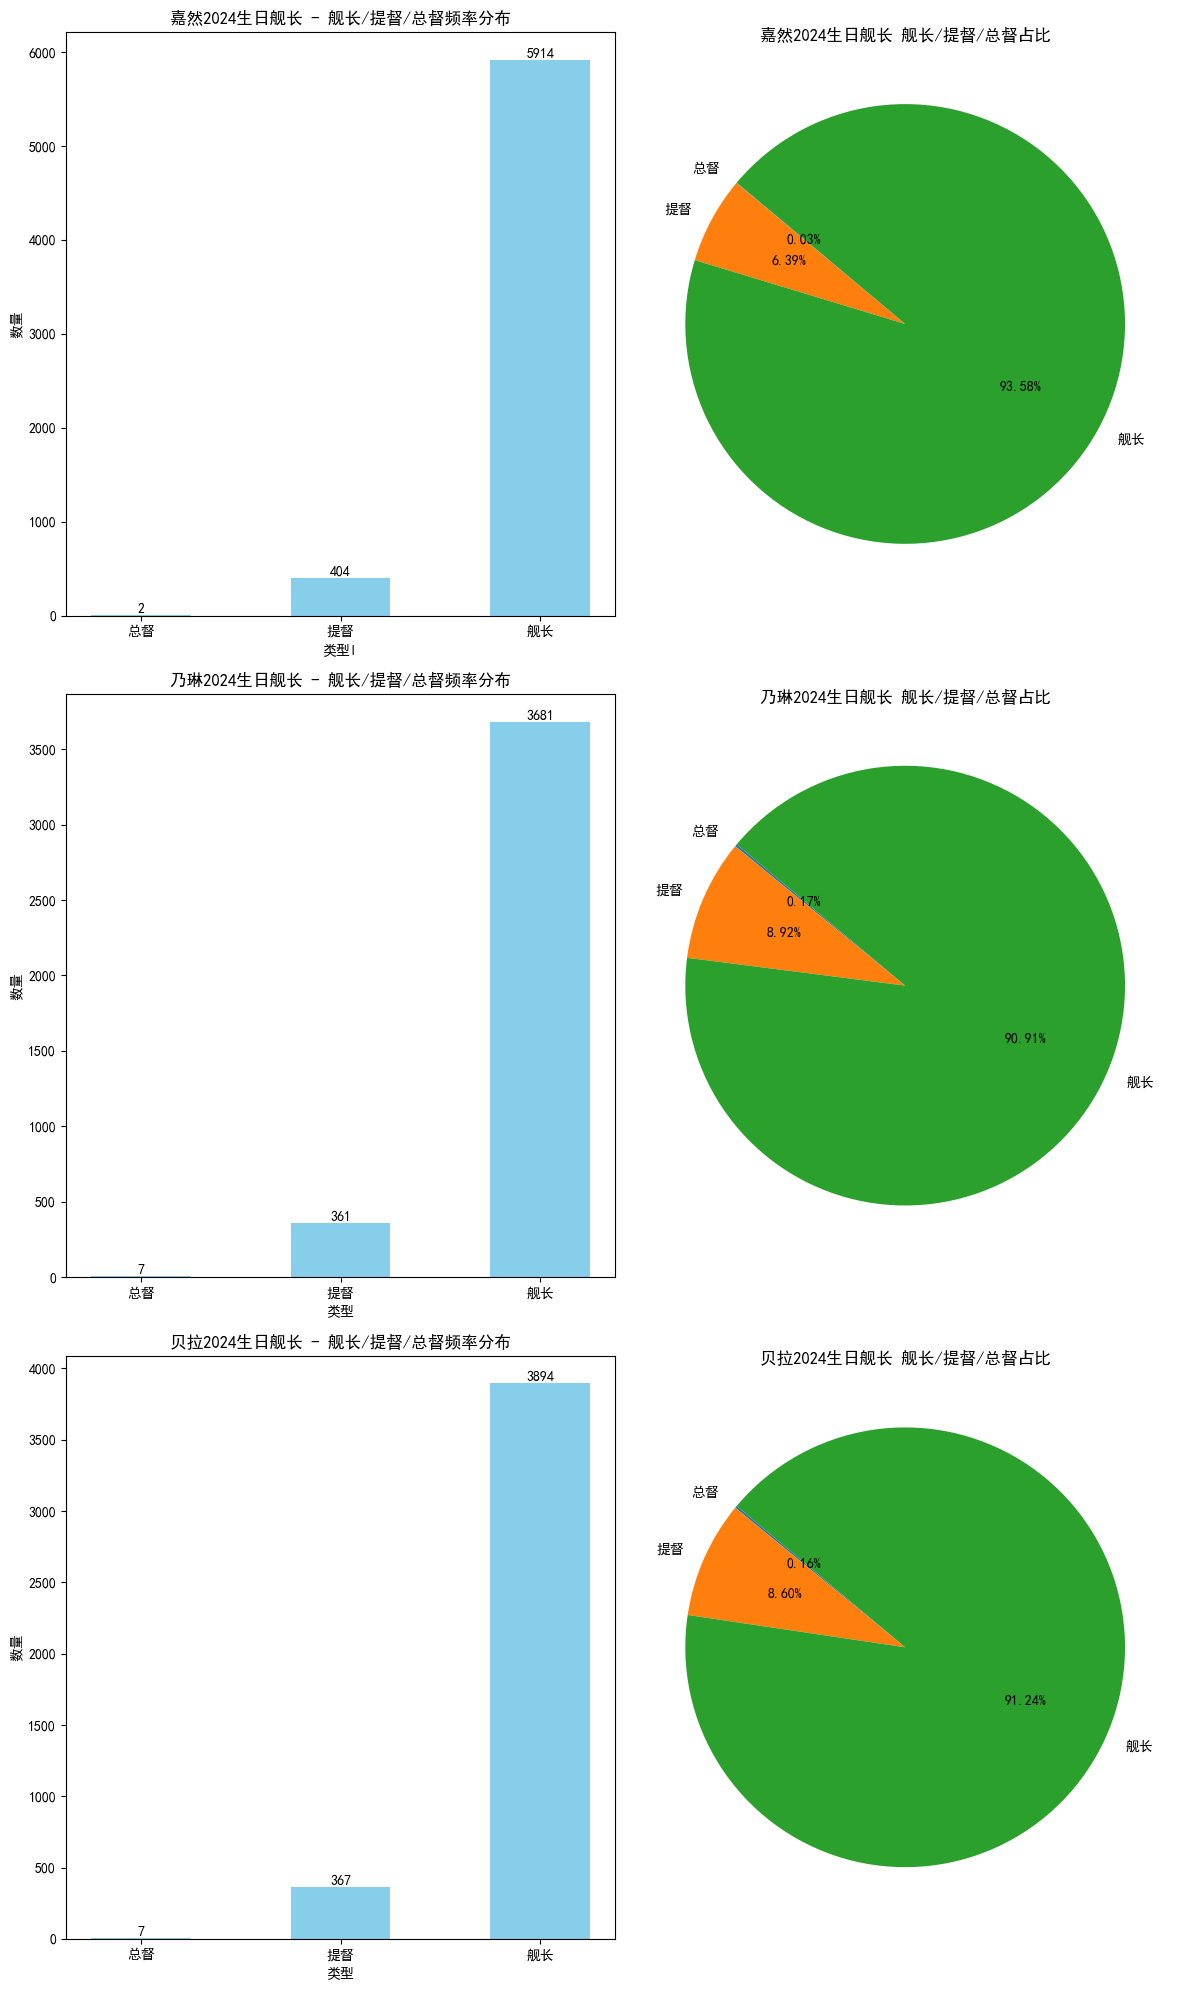

In [60]:
fig, axes = plt.subplots(3, 2, figsize=(12, 20))
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()
# 绘制柱状图
bars1 = ax1.bar(jiaran_labels, jiaran_sizes, color='skyblue', width = 0.5)
ax1.set_title('嘉然2024生日舰长 - 舰长/提督/总督频率分布')
ax1.set_xlabel('类型l')
ax1.set_ylabel('数量')
# 在每个柱子上方添加绝对数量的标注
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# 绘制饼图
ax2.pie(jiaran_sizes, labels=jiaran_labels, autopct='%1.2f%%', startangle=140)
ax2.set_title('嘉然2024生日舰长 舰长/提督/总督占比')

# ---
# 绘制柱状图
bars3 = ax3.bar(nailin_labels, nailin_sizes, color='skyblue', width = 0.5)
ax3.set_title('乃琳2024生日舰长 - 舰长/提督/总督频率分布')
ax3.set_xlabel('类型')
ax3.set_ylabel('数量')
# 在每个柱子上方添加绝对数量的标注
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# 绘制饼图
ax4.pie(nailin_sizes, labels=nailin_labels, autopct='%1.2f%%', startangle=140)
ax4.set_title('乃琳2024生日舰长 舰长/提督/总督占比')

# ---
# 绘制柱状图
bars5 = ax5.bar(beila_labels, beila_sizes, color='skyblue', width = 0.5)
ax5.set_title('贝拉2024生日舰长 - 舰长/提督/总督频率分布')
ax5.set_xlabel('类型')
ax5.set_ylabel('数量')
# 在每个柱子上方添加绝对数量的标注
for bar in bars5:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# 绘制饼图
ax6.pie(beila_sizes, labels=beila_labels, autopct='%1.2f%%', startangle=140)
ax6.set_title('贝拉2024生日舰长 舰长/提督/总督占比')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

In [62]:
jiaran_level_counts

Counter({'舰长': 5914, '提督': 404, '总督': 2})

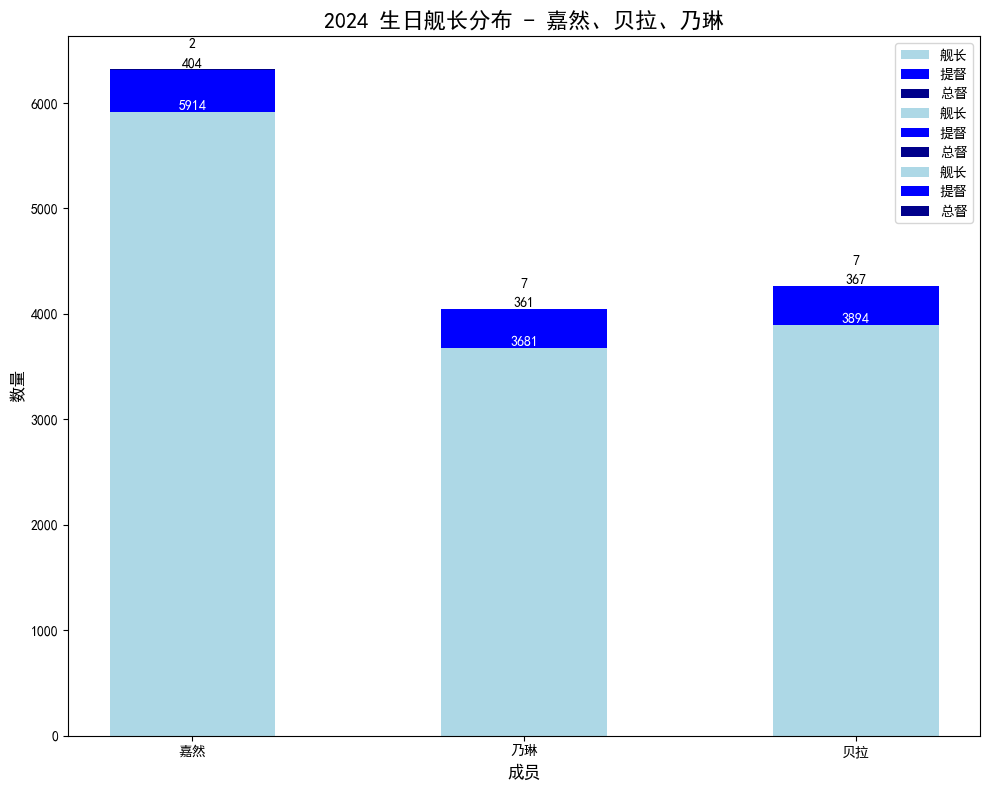

In [80]:
# 绘制堆叠柱状图
bar_width = 0.5
categories = ['舰长', '提督', '总督']
index = np.arange(len(categories))
jiaran_sizes_stack = [jiaran_level_counts[cat] for cat in categories]
nailin_sizes_stack = [nailin_level_counts[cat] for cat in categories]
beila_sizes_stack = [beila_level_counts[cat] for cat in categories]
fig, ax = plt.subplots(figsize=(10, 8))

p1 = ax.bar('嘉然', jiaran_sizes_stack[0], bar_width, label='舰长', color='lightblue')
p2 = ax.bar('嘉然', jiaran_sizes_stack[1], bar_width, bottom=jiaran_sizes_stack[0], label='提督', color='blue')
p3 = ax.bar('嘉然', jiaran_sizes_stack[2], bar_width, bottom=np.array(jiaran_sizes_stack[:2]).sum(), label='总督', color='darkblue')

p4 = ax.bar('乃琳', nailin_sizes_stack[0], bar_width, label='舰长', color='lightblue')
p5 = ax.bar('乃琳', nailin_sizes_stack[1], bar_width, bottom=nailin_sizes_stack[0], label='提督', color='blue')
p6 = ax.bar('乃琳', nailin_sizes_stack[2], bar_width, bottom=np.array(nailin_sizes_stack[:2]).sum(), label='总督', color='darkblue')

p7 = ax.bar('贝拉', beila_sizes_stack[0], bar_width, label='舰长', color='lightblue')
p8 = ax.bar('贝拉', beila_sizes_stack[1], bar_width, bottom=beila_sizes_stack[0], label='提督', color='blue')
p9 = ax.bar('贝拉', beila_sizes_stack[2], bar_width, bottom=np.array(beila_sizes_stack[:2]).sum(), label='总督', color='darkblue')


# 在柱子上显示数字
def add_labels(bars, offset=0, color='black'):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0 , offset + height, f'{int(height)}', ha='center', va='bottom', color=color)

# 显示嘉然的堆叠部分数字
add_labels(p1, color='white')
add_labels(p2, offset=jiaran_sizes_stack[0])
add_labels(p3, offset=np.array(jiaran_sizes_stack[:2]).sum()+180)

# 显示乃琳的堆叠部分数字
add_labels(p4, color='white')
add_labels(p5, offset=nailin_sizes_stack[0])
add_labels(p6, offset=np.array(nailin_sizes_stack[:2]).sum()+180)

# 显示贝拉的堆叠部分数字
add_labels(p7, color='white')
add_labels(p8, offset=beila_sizes_stack[0])
add_labels(p9, offset=np.array(beila_sizes_stack[:2]).sum()+180)

# 添加标题和标签
ax.set_title('2024 生日舰长分布 - 嘉然、贝拉、乃琳', fontsize=16)
ax.set_xlabel('成员', fontsize=12)
ax.set_ylabel('数量', fontsize=12)

# 添加图例
ax.legend(loc='upper right')

# 显示图表
plt.tight_layout()
plt.show()

## 2. 舰长重叠度分析
### 2.1 给两位和三位成员均上舰的

In [81]:
# 查找diana_df和bella_df之间的重复UID
diana_bella_common = pd.merge(diana_df[['UID']], bella_df[['UID']], on='UID')
print(f"同时出现在嘉然和贝拉列表中的UID数量: {diana_bella_common.shape[0]}")

# 查找diana_df和eileen_df之间的重复UID
diana_eileen_common = pd.merge(diana_df[['UID']], eileen_df[['UID']], on='UID')
print(f"同时出现在嘉然和乃琳列表中的UID数量: {diana_eileen_common.shape[0]}")

# 查找bella_df和eileen_df之间的重复UID
bella_eileen_common = pd.merge(bella_df[['UID']], eileen_df[['UID']], on='UID')
print(f"同时出现在贝拉和乃琳列表中的UID数量: {bella_eileen_common.shape[0]}")

# 查找同时出现在三个列表中的UID
common_all_three = pd.merge(diana_bella_common, eileen_df[['UID']], on='UID')
print(f"同时出现在嘉然、贝拉和乃琳列表中的UID数量: {common_all_three.shape[0]}")

同时出现在嘉然和贝拉列表中的UID数量: 2484
同时出现在嘉然和乃琳列表中的UID数量: 2053
同时出现在贝拉和乃琳列表中的UID数量: 2218
同时出现在嘉然、贝拉和乃琳列表中的UID数量: 1760


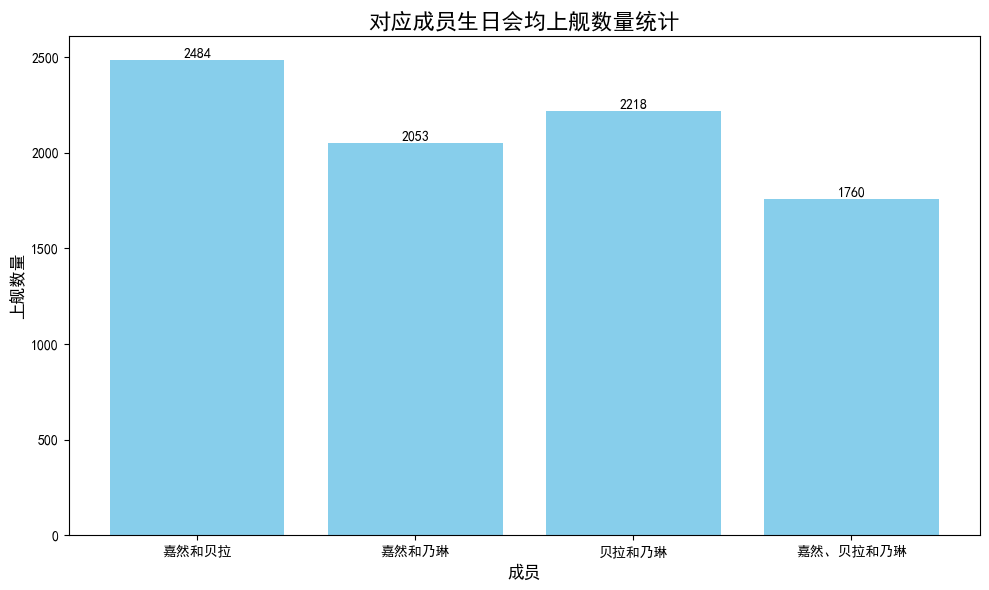

In [83]:
count_diana_bella = diana_bella_common.shape[0]  # 同时出现在嘉然和贝拉列表中的UID数量
count_diana_eileen = diana_eileen_common.shape[0]  # 同时出现在嘉然和乃琳列表中的UID数量
count_bella_eileen = bella_eileen_common.shape[0]  # 同时出现在贝拉和乃琳列表中的UID数量
count_all_three = common_all_three.shape[0]  # 同时出现在三个列表中的UID数量

# 准备数据
labels = ['嘉然和贝拉', '嘉然和乃琳', '贝拉和乃琳', '嘉然、贝拉和乃琳']
counts = [count_diana_bella, count_diana_eileen, count_bella_eileen, count_all_three]

# 创建柱状图
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, counts, color='skyblue')

# 在柱子上方添加数量标注
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

# 添加标题和标签
ax.set_title('对应成员生日会均上舰数量统计', fontsize=16)
ax.set_xlabel('成员', fontsize=12)
ax.set_ylabel('上舰数量', fontsize=12)

# 显示图表
plt.tight_layout()
plt.show()

### 2.2 给某两个成员上舰但没给另一个成员上舰的人数,以及仅给某成员上舰的人数

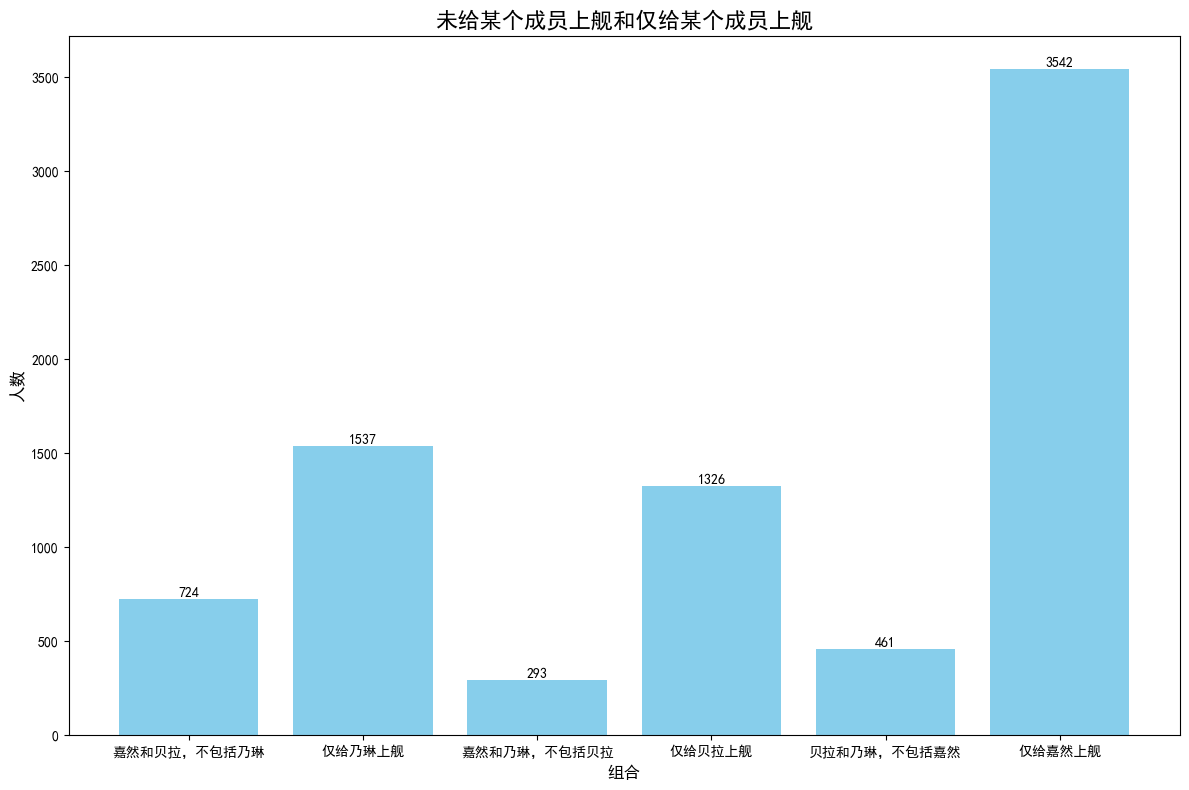

In [87]:
diana_uids = set(diana_df['UID'])
bella_uids = set(bella_df['UID'])
eileen_uids = set(eileen_df['UID'])
# 计算给某两个成员上舰但没给另一个成员上舰的人数
diana_bella_not_eileen = (diana_uids & bella_uids) - eileen_uids
diana_eileen_not_bella = (diana_uids & eileen_uids) - bella_uids
bella_eileen_not_diana = (bella_uids & eileen_uids) - diana_uids

# 计算三个成员舰长中仅给该成员上舰了的人数
only_diana = diana_uids - bella_uids - eileen_uids
only_bella = bella_uids - diana_uids - eileen_uids
only_eileen = eileen_uids - diana_uids - bella_uids

# 准备数据用于绘制柱状图
labels = ['嘉然和贝拉，不包括乃琳', '仅给乃琳上舰','嘉然和乃琳，不包括贝拉', '仅给贝拉上舰', '贝拉和乃琳，不包括嘉然',
          '仅给嘉然上舰',  ]
counts = [len(diana_bella_not_eileen),len(only_eileen), len(diana_eileen_not_bella),len(only_bella), len(bella_eileen_not_diana),
          len(only_diana) ]

# 绘制柱状图
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(labels, counts, color='skyblue')

# 在柱子上方添加数量标注
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

# 添加标题和标签
ax.set_title('未给某个成员上舰和仅给某个成员上舰', fontsize=16)
ax.set_xlabel('组合', fontsize=12)
ax.set_ylabel('人数', fontsize=12)

# 显示图表
plt.tight_layout()
plt.show()

### 2.3 仅没给某个成员上舰的人在已上舰成员舰长当中的占比和数量

In [97]:
len(diana_bella_not_eileen ) / len(diana_uids)

0.11462951234958835

C:\Users\81941\AppData\Local\Temp\ipykernel_23976\4082153587.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')


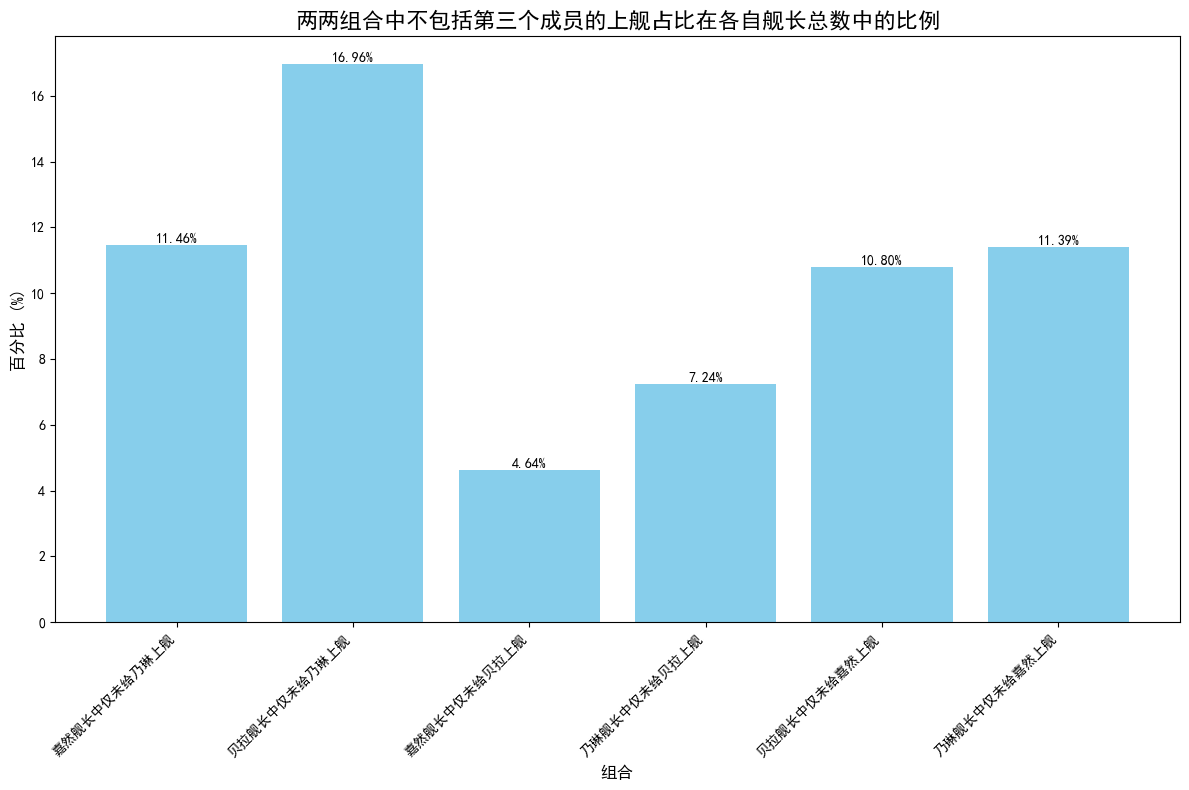

In [98]:
# 计算这些人数在各自舰长总数中的占比
diana_bella_not_eileen_in_diana = len(diana_bella_not_eileen) / len(diana_uids) * 100
diana_bella_not_eileen_in_bella = len(diana_bella_not_eileen) / len(bella_uids) * 100

diana_eileen_not_bella_in_diana = len(diana_eileen_not_bella) / len(diana_uids) * 100
diana_eileen_not_bella_in_eileen = len(diana_eileen_not_bella) / len(eileen_uids) * 100

bella_eileen_not_diana_in_bella = len(bella_eileen_not_diana) / len(bella_uids) * 100
bella_eileen_not_diana_in_eileen = len(bella_eileen_not_diana) / len(eileen_uids) * 100

# 准备数据用于绘制柱状图
labels = ['嘉然舰长中仅未给乃琳上舰', '贝拉舰长中仅未给乃琳上舰', 
          '嘉然舰长中仅未给贝拉上舰', '乃琳舰长中仅未给贝拉上舰', 
          '贝拉舰长中仅未给嘉然上舰', '乃琳舰长中仅未给嘉然上舰']

percentages = [diana_bella_not_eileen_in_diana, diana_bella_not_eileen_in_bella,
               diana_eileen_not_bella_in_diana, diana_eileen_not_bella_in_eileen,
               bella_eileen_not_diana_in_bella, bella_eileen_not_diana_in_eileen]

# 绘制柱状图
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(labels, percentages, color='skyblue')

# 在柱子上方添加百分比标注
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

# 添加标题和标签
ax.set_title('两两组合中不包括第三个成员的上舰占比在各自舰长总数中的比例', fontsize=16)
ax.set_xlabel('组合', fontsize=12)
ax.set_ylabel('百分比 (%)', fontsize=12)
ax.set_xticklabels(labels, rotation=45, ha='right')
# 显示图表
plt.tight_layout()
plt.show()

C:\Users\81941\AppData\Local\Temp\ipykernel_23976\2611350087.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')


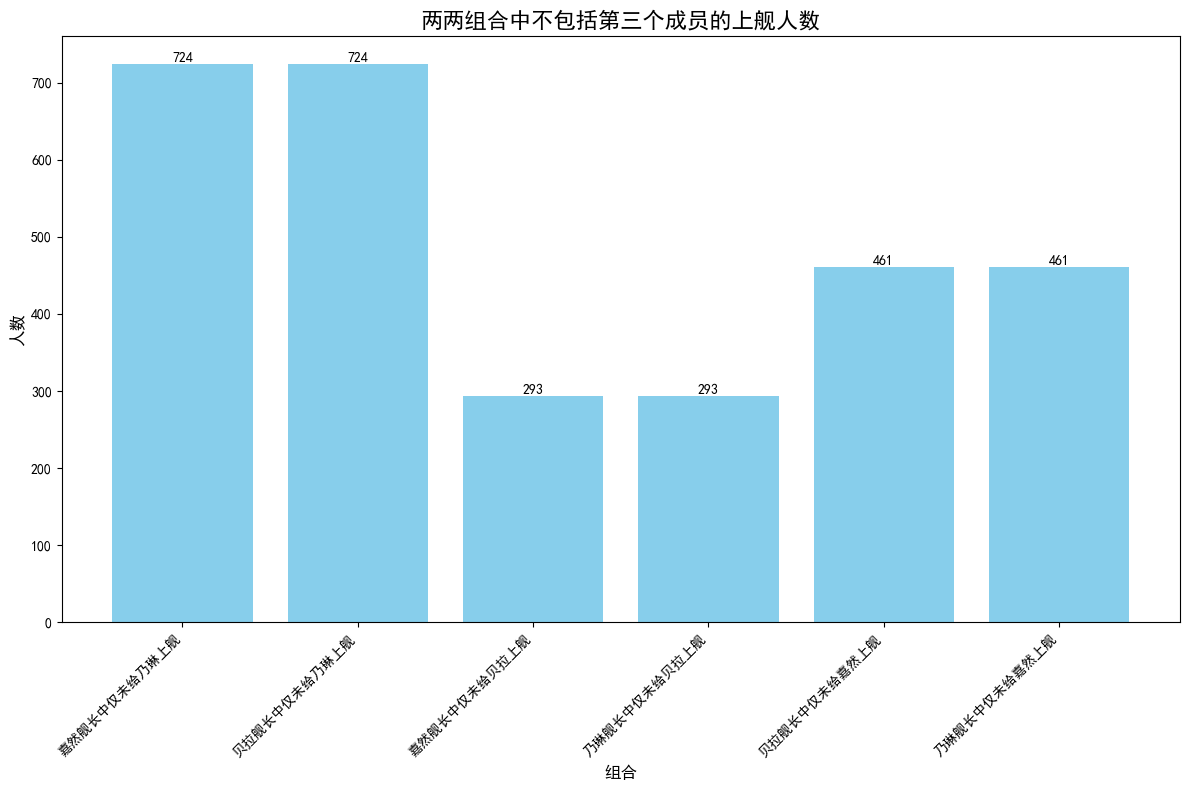

In [99]:
# 直接使用人数而不是百分比
diana_bella_not_eileen_count = len(diana_bella_not_eileen)
diana_eileen_not_bella_count = len(diana_eileen_not_bella)
bella_eileen_not_diana_count = len(bella_eileen_not_diana)

# 准备数据用于绘制柱状图
labels = ['嘉然舰长中仅未给乃琳上舰', '贝拉舰长中仅未给乃琳上舰', 
          '嘉然舰长中仅未给贝拉上舰', '乃琳舰长中仅未给贝拉上舰', 
          '贝拉舰长中仅未给嘉然上舰', '乃琳舰长中仅未给嘉然上舰']

counts = [diana_bella_not_eileen_count, diana_bella_not_eileen_count,
          diana_eileen_not_bella_count, diana_eileen_not_bella_count,
          bella_eileen_not_diana_count, bella_eileen_not_diana_count]

# 绘制柱状图
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(labels, counts, color='skyblue')

# 在柱子上方添加数量标注
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

# 添加标题和标签
ax.set_title('两两组合中不包括第三个成员的上舰人数', fontsize=16)
ax.set_xlabel('组合', fontsize=12)
ax.set_ylabel('人数', fontsize=12)
ax.set_xticklabels(labels, rotation=45, ha='right')

# 显示图表
plt.tight_layout()
plt.show()

## 2.4 未给某一成员上舰的比例

C:\Users\81941\AppData\Local\Temp\ipykernel_23976\3965898031.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')


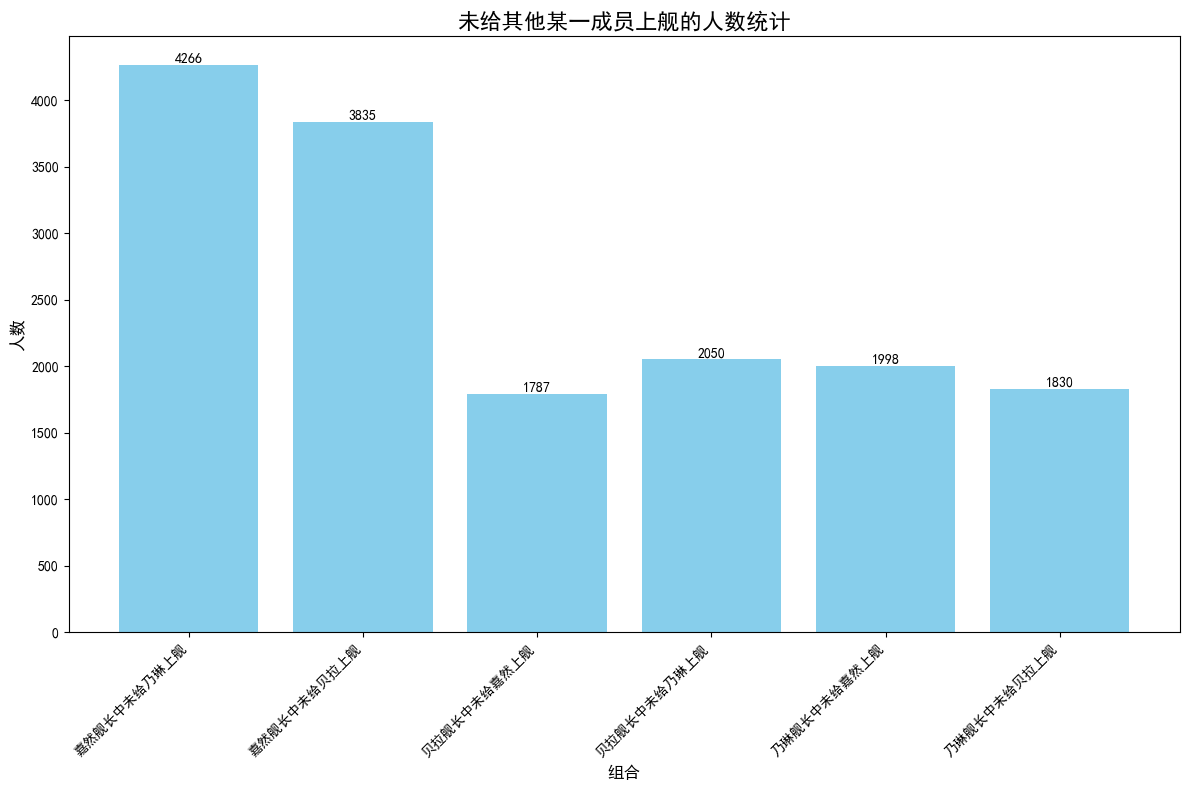

In [100]:
# 计算仅未给某个成员上舰的人数
diana_not_eileen = diana_uids - eileen_uids
diana_not_bella = diana_uids - bella_uids

bella_not_diana = bella_uids - diana_uids
bella_not_eileen = bella_uids - eileen_uids

eileen_not_diana = eileen_uids - diana_uids
eileen_not_bella = eileen_uids - bella_uids

# 计算人数
diana_not_eileen_count = len(diana_not_eileen)
diana_not_bella_count = len(diana_not_bella)

bella_not_diana_count = len(bella_not_diana)
bella_not_eileen_count = len(bella_not_eileen)

eileen_not_diana_count = len(eileen_not_diana)
eileen_not_bella_count = len(eileen_not_bella)

# 准备数据用于绘制柱状图
labels = ['嘉然舰长中未给乃琳上舰', '嘉然舰长中未给贝拉上舰', 
          '贝拉舰长中未给嘉然上舰', '贝拉舰长中未给乃琳上舰', 
          '乃琳舰长中未给嘉然上舰', '乃琳舰长中未给贝拉上舰']

counts = [diana_not_eileen_count, diana_not_bella_count,
          bella_not_diana_count, bella_not_eileen_count,
          eileen_not_diana_count, eileen_not_bella_count]

# 绘制柱状图
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(labels, counts, color='skyblue')

# 在柱子上方添加人数标注
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

# 添加标题和标签
ax.set_title('未给其他某一成员上舰的人数统计', fontsize=16)
ax.set_xlabel('组合', fontsize=12)
ax.set_ylabel('人数', fontsize=12)
ax.set_xticklabels(labels, rotation=45, ha='right')

# 显示图表
plt.tight_layout()
plt.show()

C:\Users\81941\AppData\Local\Temp\ipykernel_23976\1740016267.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')


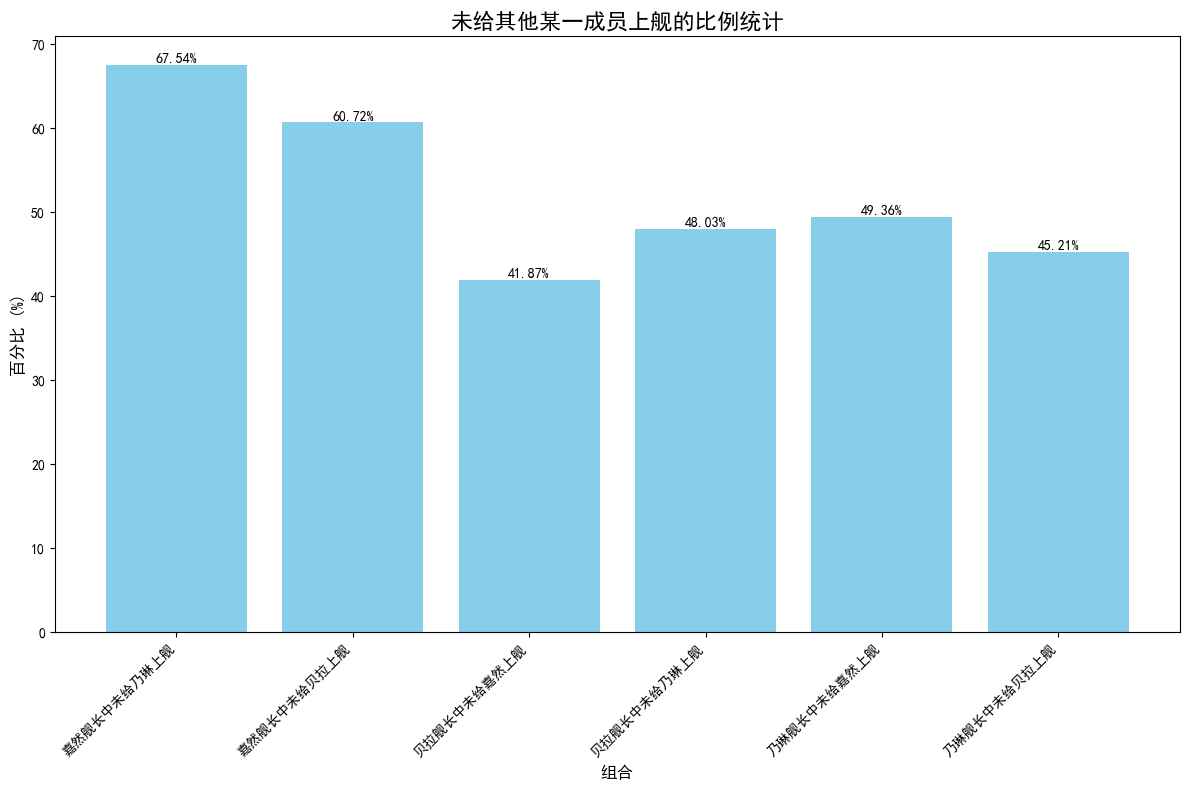

In [101]:
# 计算比例
diana_not_eileen_ratio = len(diana_not_eileen) / len(diana_uids) * 100
diana_not_bella_ratio = len(diana_not_bella) / len(diana_uids) * 100

bella_not_diana_ratio = len(bella_not_diana) / len(bella_uids) * 100
bella_not_eileen_ratio = len(bella_not_eileen) / len(bella_uids) * 100

eileen_not_diana_ratio = len(eileen_not_diana) / len(eileen_uids) * 100
eileen_not_bella_ratio = len(eileen_not_bella) / len(eileen_uids) * 100

# 准备数据用于绘制柱状图
labels = ['嘉然舰长中未给乃琳上舰', '嘉然舰长中未给贝拉上舰', 
          '贝拉舰长中未给嘉然上舰', '贝拉舰长中未给乃琳上舰', 
          '乃琳舰长中未给嘉然上舰', '乃琳舰长中未给贝拉上舰']

percentages = [diana_not_eileen_ratio, diana_not_bella_ratio,
               bella_not_diana_ratio, bella_not_eileen_ratio,
               eileen_not_diana_ratio, eileen_not_bella_ratio]

# 绘制柱状图
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(labels, percentages, color='skyblue')

# 在柱子上方添加百分比标注
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

# 添加标题和标签
ax.set_title('未给其他某一成员上舰的比例统计', fontsize=16)
ax.set_xlabel('组合', fontsize=12)
ax.set_ylabel('百分比 (%)', fontsize=12)
ax.set_xticklabels(labels, rotation=45, ha='right')

# 显示图表
plt.tight_layout()
plt.show()

### 2.5 大饼图

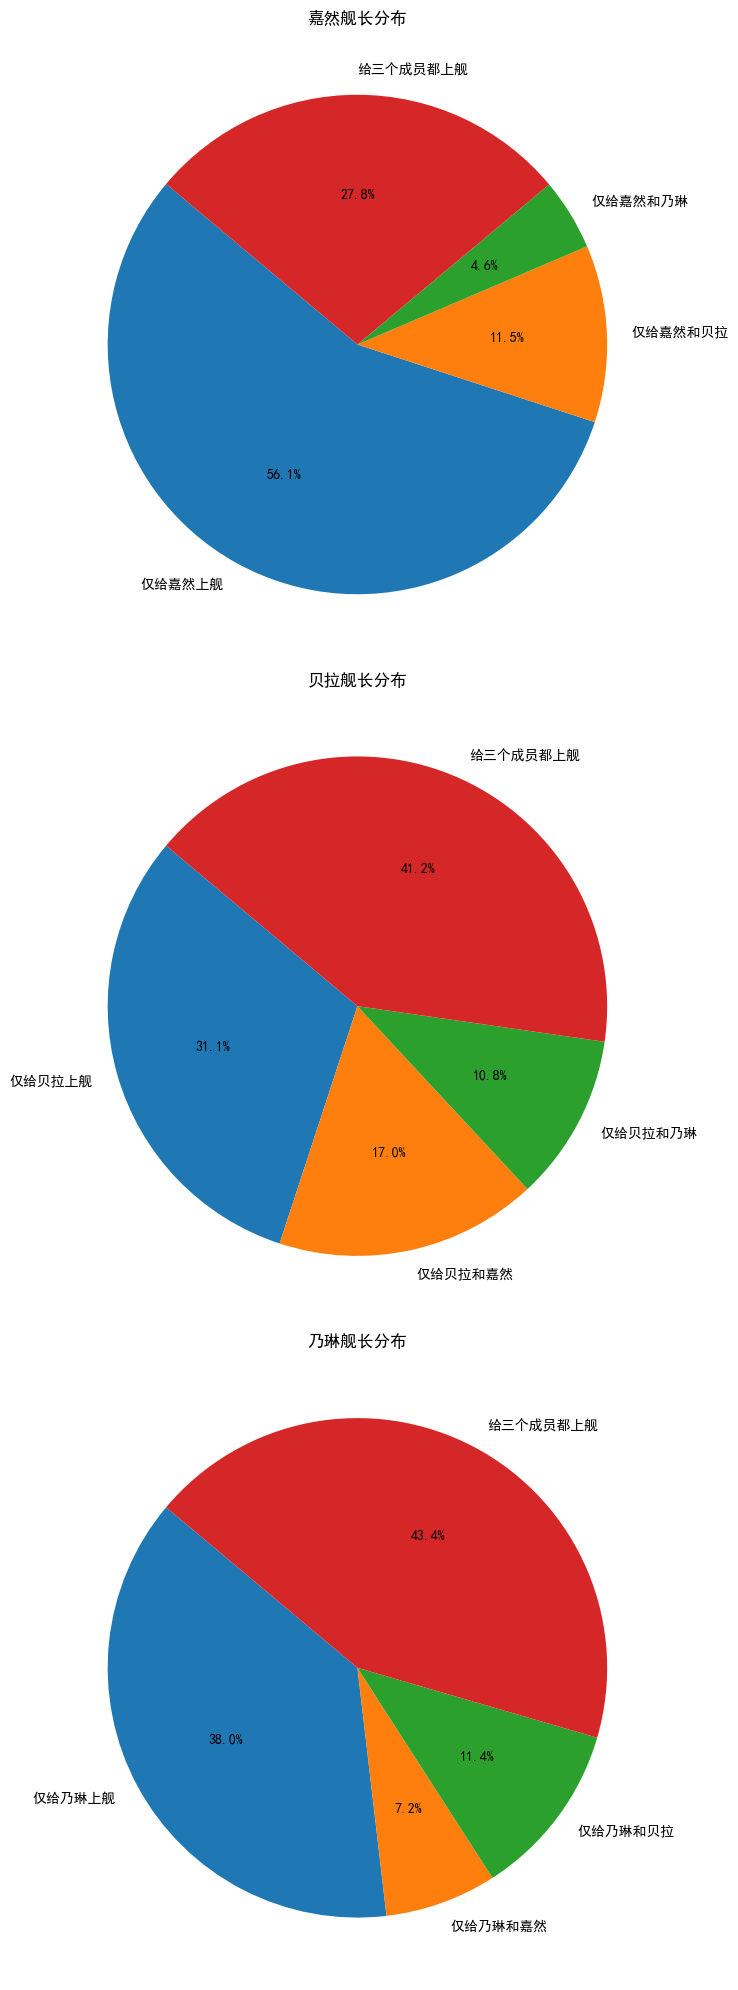

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
diana_df = pd.read_csv('嘉然2024生日舰长列表.csv')
bella_df = pd.read_csv('贝拉2024生日舰长列表.csv')
eileen_df = pd.read_csv('乃琳2024生日舰长列表.csv')

# 转换为集合以便于操作
diana_uids = set(diana_df['UID'])
bella_uids = set(bella_df['UID'])
eileen_uids = set(eileen_df['UID'])

# 计算各种组合的数量
# 嘉然
only_diana = diana_uids - bella_uids - eileen_uids
diana_bella_not_eileen = (diana_uids & bella_uids) - eileen_uids
diana_eileen_not_bella = (diana_uids & eileen_uids) - bella_uids
all_three = diana_uids & bella_uids & eileen_uids

# 贝拉
only_bella = bella_uids - diana_uids - eileen_uids
bella_diana_not_eileen = diana_bella_not_eileen  # Same as diana_bella_not_eileen
bella_eileen_not_diana = (bella_uids & eileen_uids) - diana_uids

# 乃琳
only_eileen = eileen_uids - diana_uids - bella_uids
eileen_diana_not_bella = diana_eileen_not_bella  # Same as diana_eileen_not_bella
eileen_bella_not_diana = bella_eileen_not_diana  # Same as bella_eileen_not_diana

# 准备数据用于绘制饼图
diana_sizes = [len(only_diana), len(diana_bella_not_eileen), len(diana_eileen_not_bella), len(all_three)]
bella_sizes = [len(only_bella), len(bella_diana_not_eileen), len(bella_eileen_not_diana), len(all_three)]
eileen_sizes = [len(only_eileen), len(eileen_diana_not_bella), len(eileen_bella_not_diana), len(all_three)]

labels_diana = ['仅给嘉然上舰', '仅给嘉然和贝拉', '仅给嘉然和乃琳', '给三个成员都上舰']
labels_bella = ['仅给贝拉上舰', '仅给贝拉和嘉然', '仅给贝拉和乃琳', '给三个成员都上舰']
labels_eileen = ['仅给乃琳上舰', '仅给乃琳和嘉然', '仅给乃琳和贝拉', '给三个成员都上舰']


# 绘制饼图
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 20))

ax1.pie(diana_sizes, labels=labels_diana, autopct='%1.1f%%', startangle=140)
ax1.set_title('嘉然舰长分布')

ax2.pie(bella_sizes, labels=labels_bella, autopct='%1.1f%%', startangle=140)
ax2.set_title('贝拉舰长分布')

ax3.pie(eileen_sizes, labels=labels_eileen, autopct='%1.1f%%', startangle=140)
ax3.set_title('乃琳舰长分布')

# 调整布局
plt.tight_layout()
plt.show()
